In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


user_id - Id of user

book_id - Id of Book

review_id - Id of review

rating - rating from 0 to 5

review_text - review text

date_added - date added

date_updated - date updated

read_at - read at

started_at - started at

n_votes - no. of votes

n_comments - no. of comments

*  Import required libraries
*  load the data
*  Perform EDA
*  Remove stop words and  apply stemming
*  Convert the text data into vectors
*  Split data into training and testing
*  Define our model
*  Test the model on testing data
*  Check the accuracy
*  Test on the custom data

Import required library for use

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
import re, string, unicodedata

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Training data preprocessing**

In [3]:
train_book=pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv')

In [4]:
test_book=pd.read_csv('/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv')

In [5]:
train_book

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


We will predict the best book or review on basis of rating and other important features.

In [6]:
train_book.shape

(900000, 11)

In [7]:
train_book.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [8]:
train_book.corr()

,book_id,rating,n_votes,n_comments
book_id,1.000000,0.022840,0.076208,0.030068
rating,0.022840,1.000000,0.006663,-0.003530
n_votes,0.076208,0.006663,1.000000,0.626733
n_comments,0.030068,-0.003530,0.626733,1.000000


In [9]:
train_book['review_text']

0         This is a special book. It started slow for ab...
1         Recommended by Don Katz. Avail for free in Dec...
2         A fun, fast paced science fiction thriller. I ...
3         Recommended reading to understand what is goin...
4         I really enjoyed this book, and there is a lot...
                                ...                        
899995    3.5 stars. \n Jenna is a popular YA author and...
899996    This was a quick read for me. I have read a lo...
899997    ** spoiler alert ** \n 3.5 stars. \n This book...
899998    ** spoiler alert ** \n Another fun read from M...
899999    ** spoiler alert ** \n 3.5 stars \n I liked it...
Name: review_text, Length: 900000, dtype: object

In [10]:
train_book.drop(['user_id','review_id','date_added','date_updated','read_at','started_at'],axis=1,inplace=True)

In [11]:
train_book

,book_id,rating,review_text,n_votes,n_comments
0,18245960,5,This is a special book. It started slow for ab...,28,1
1,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,0
2,28684704,3,"A fun, fast paced science fiction thriller. I ...",22,0
3,27161156,0,Recommended reading to understand what is goin...,5,1
4,25884323,4,"I really enjoyed this book, and there is a lot...",9,1
...,...,...,...,...,...
899995,11832081,3,3.5 stars. \n Jenna is a popular YA author and...,0,0
899996,16095092,3,This was a quick read for me. I have read a lo...,1,1
899997,8430896,4,** spoiler alert ** \n 3.5 stars. \n This book...,1,0
899998,12275680,4,** spoiler alert ** \n Another fun read from M...,0,0


In [12]:
train_book.corr()#find the correlation between the respective columns to be involved in prediction.

,book_id,rating,n_votes,n_comments
book_id,1.000000,0.022840,0.076208,0.030068
rating,0.022840,1.000000,0.006663,-0.003530
n_votes,0.076208,0.006663,1.000000,0.626733
n_comments,0.030068,-0.003530,0.626733,1.000000


In [13]:
# unique ratings
pd.unique(train_book['rating'])

array([5, 3, 0, 4, 2, 1])

In [14]:
train_book['rating'].value_counts(normalize=True)

4    0.348542
5    0.294452
3    0.209969
2    0.080697
0    0.034431
1    0.031909
Name: rating, dtype: float64

In [15]:
pd.unique(train_book['n_comments'])

array([   1,    0,    5,    3,    6,    4,    2,   10,   25,    9,    7,
          8,   13,   18,   14,   11,   12,   21,   17,   22,   16,   50,
         23,   39,   15,   20,   27,   64,   32,   75,   -1,   19,   35,
         24,   26,   47,   34,   52,   53,   29,   66,   30,   33,   42,
         59,   63,   28,   38,   36,   43,   40,   41,   56,   49,   37,
         44,   55,   45,   96,   73,   31,   62,  105,   60,   84,   58,
         76,   65,   51,  146,   54,   85,   61,   70,  102,  132,   48,
        106,   71,   57,   86,   46,  115,  117,   77,   88,  564,  140,
         80,   68,   79,  285,   67,   81,   98,   90,   95,  110,   99,
         94,   72,  155,  103,  109,   74,  135,  190,   93,   69,  804,
         91,  126,  158,  104,  120,   89,   92,  134,   97,  108,  468,
         82,   83,  127,  101,  123,  133,  118,  131,  112,   78,  116,
        136,  128,  165,  125,  107,  144,  141,  124,   87,  100, 1335,
        138,  121,  161,  170,  143,  202,  222,  1

* Categorize good book and average and not recommeded book on basis of reviews andratings.

[Text(0.5, 1.0, 'Ratings of all books')]

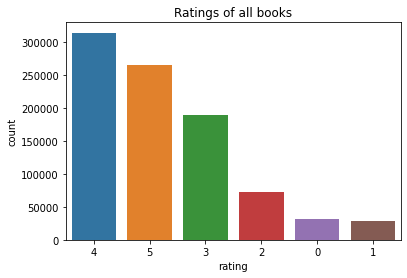

In [16]:
sns.countplot(data=train_book,
              x='rating',
              order=train_book.rating.value_counts().index).set(title='Ratings of all books')


In [17]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
!pip install wordcloud  

In [19]:
import pandas as pd
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
train_book['review_text']=train_book['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Make text data as lower**

In [20]:
train_book['review_text']= train_book['review_text'].apply(lambda x: x.lower())

In [21]:
train_book

,book_id,rating,review_text,n_votes,n_comments
0,18245960,5,this special book. it started slow first third...,28,1
1,16981,3,recommended don katz. avail free december: htt...,1,0
2,28684704,3,"a fun, fast paced science fiction thriller. i ...",22,0
3,27161156,0,recommended reading understand going middle am...,5,1
4,25884323,4,"i really enjoyed book, lot recommend it. it dr...",9,1
...,...,...,...,...,...
899995,11832081,3,3.5 stars. jenna popular ya author agent wants...,0,0
899996,16095092,3,this quick read me. i read lot new adult books...,1,1
899997,8430896,4,** spoiler alert ** 3.5 stars. this book sweet...,1,0
899998,12275680,4,** spoiler alert ** another fun read ms evanov...,0,0


**Import punctuation library**

In [22]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Remove Punctuation**

In [23]:
# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
train_book['review_text'] =train_book['review_text'].apply(remove_punctuations)

**Remove the urls**

In [24]:
train_book['review_text'] =train_book['review_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

**Remove the numbers from the text data**

In [25]:
train_book['review_text'] =train_book['review_text'].str.replace('\d+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**Do the tokenization operation on text data**

In [26]:

def tokenize_data(text):
    tokens=re.split('w+',text)
    return tokens
train_book['review_text']=train_book['review_text'].apply(lambda x : tokenize_data(x))

In [27]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [28]:
def stemmer(text):
    data_steemer=[porter_stemmer.stem(word)for word in text]
    return data_steemer
train_book['review_text']=train_book['review_text'].apply(lambda x:stemmer(x))

In [29]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [30]:
train_book['review_text'] = [','.join(map(str, l)) for l in train_book['review_text']]

In [31]:
train_book

,book_id,rating,review_text,n_votes,n_comments
0,18245960,5,"this special book it started slo, first third ...",28,1
1,16981,3,recommended don katz avail free december,1,0
2,28684704,3,a fun fast paced science fiction thriller i re...,22,0
3,27161156,0,recommended reading understand going middle am...,5,1
4,25884323,4,i really enjoyed book lot recommend it it drag...,9,1
...,...,...,...,...,...
899995,11832081,3,"stars jenna popular ya author agent ,ants cha...",0,0
899996,16095092,3,"this quick read me i read lot n, adult books r...",1,1
899997,8430896,4,"spoiler alert stars this book ,eet inside o...",1,0
899998,12275680,4,spoiler alert another fun read ms evanovich ...,0,0


**Sentiment Analysis using VADER library**


In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
analyzer = SentimentIntensityAnalyzer()

****

**Create negative polarity score for each row**

In [34]:
train_book['neg'] = [analyzer.polarity_scores(x)['neg'] for x in train_book['review_text']]

In [35]:
train_book['pos'] = [analyzer.polarity_scores(x)['pos'] for x in train_book['review_text']]

In [36]:
train_book['neutral'] = [analyzer.polarity_scores(x)['neu'] for x in train_book['review_text']]

In [37]:
#train_book['polarity'] =train_book['review_text'].apply(lambda x:analyzer.polarity_scores(x))


In [38]:
train_book

,book_id,rating,review_text,n_votes,n_comments,neg,pos,neutral
0,18245960,5,"this special book it started slo, first third ...",28,1,0.134,0.179,0.687
1,16981,3,recommended don katz avail free december,1,0,0.000,0.560,0.440
2,28684704,3,a fun fast paced science fiction thriller i re...,22,0,0.123,0.145,0.733
3,27161156,0,recommended reading understand going middle am...,5,1,0.000,0.343,0.657
4,25884323,4,i really enjoyed book lot recommend it it drag...,9,1,0.092,0.214,0.695
...,...,...,...,...,...,...,...,...
899995,11832081,3,"stars jenna popular ya author agent ,ants cha...",0,0,0.032,0.383,0.585
899996,16095092,3,"this quick read me i read lot n, adult books r...",1,1,0.267,0.129,0.605
899997,8430896,4,"spoiler alert stars this book ,eet inside o...",1,0,0.176,0.285,0.538
899998,12275680,4,spoiler alert another fun read ms evanovich ...,0,0,0.042,0.358,0.599
